In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sp
import scipy.linalg
%matplotlib inline

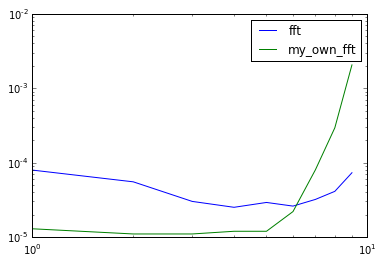

In [2]:
def fft_matrix(n):
    i,j = np.meshgrid(np.arange(n), np.arange(n))
    Fn = np.exp(-2 * np.pi * 1J * i * j / n) / np.sqrt(n)
    return Fn

fft_times = []
my_own_fft_times = []
sizes = [2**i for i in range(10)]

for i in sizes:
    x = np.random.random(i)
    current_time = time.time()
    np.fft.fft(x)
    fft_times.append(time.time() - current_time)
    
for i in sizes:
    x = np.random.random(i)
    m = fft_matrix(i)
    current_time = time.time()
    m * x
    my_own_fft_times.append(time.time() - current_time)
    
plt.yscale('log')
plt.xscale('log')
plt.plot(fft_times)
plt.plot(my_own_fft_times)
plt.legend(['fft', 'my_own_fft'], loc='upper right')

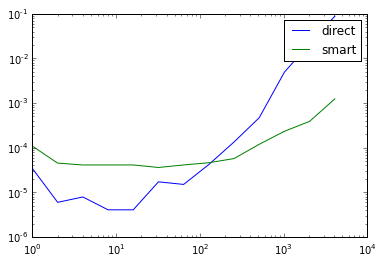

In [13]:
def circulant_matvec(c, x):
    return np.fft.ifft(np.fft.fft(c) * np.fft.fft(x))

def circulant_matrix(n):
    c = np.random.random(n)
    return sp.linalg.circulant(c)

mul_times = []
my_own_mul_times = []
sizes = [2**i for i in range(13)]

for i in sizes:
    x = np.random.random(i)
    m = circulant_matrix(i)
    current_time = time.time()
    m * x
    mul_times.append(time.time() - current_time)
    
for i in sizes:
    x = np.random.random(i)
    m = circulant_matrix(i)
    current_time = time.time()
    circulant_matvec(m[:,0], x)
    my_own_mul_times.append(time.time() - current_time)

plt.yscale('log')
plt.xscale('log')
plt.plot(sizes, mul_times)
plt.plot(sizes, my_own_mul_times)
plt.legend(['direct', 'smart'], loc='upper right')

In [14]:
def toeplitz_matvec(c, x):
    return np.fft.ifft(np.fft.fft(c) * np.fft.fft(x))

def toeplitz_matrix(n):
    c = np.random.random(n)
    return sp.linalg.toeplitz(c)

mul_times = []
my_own_mul_times = []
sizes = [10**i for i in range(4)]

for i in sizes:
    x = np.random.random(i)
    m = toeplitz_matrix(i)
    current_time = time.time()
    m * x
    mul_times.append(time.time() - current_time)
    
for i in sizes:
    x = np.random.random(i)
    m = toeplitz_matrix(i)
    current_time = time.time()
    toeplitz_matvec(m[:, 0], x)
    my_own_mul_times.append(time.time() - current_time)

plt.yscale('log')
plt.xscale('log')
plt.plot(mul_times)
plt.plot(my_own_mul_times)
plt.legend(['direct', 'smart'], loc='upper right')

IndexError: index 1 is out of bounds for axis 1 with size 1